In [67]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import re

In [68]:
import warnings
warnings.filterwarnings("ignore") 

In [69]:
os.chdir('/Users/user/Desktop/ВКР/')

In [79]:
df_schedule = pd.read_csv('processed_schedule_data_2011.csv')
df_schedule['time'] = pd.to_datetime(df_schedule['time'])
df_schedule.drop(['screen', 'occupancy'], axis = 1, inplace = True)
df_schedule.head()

,time,sales,film
0,2011-09-06 11:20:00,5,All inclusive или Все включено
1,2011-09-06 15:00:00,6,All inclusive или Все включено
2,2011-09-06 18:40:00,10,All inclusive или Все включено
3,2011-09-06 22:35:00,13,All inclusive или Все включено
4,2011-10-06 02:10:00,2,All inclusive или Все включено


In [80]:
film = 'All inclusive или Все включено'

In [81]:
group_ts = df_schedule[df_schedule['film'] == film].groupby(pd.Grouper(key="time", freq="240Min"))['sales'].sum()
X = pd.DataFrame(group_ts).reset_index()
X

,time,sales
0,2011-06-13 00:00:00,49
1,2011-06-13 04:00:00,0
2,2011-06-13 08:00:00,23
3,2011-06-13 12:00:00,49
4,2011-06-13 16:00:00,73
...,...,...
1057,2011-12-06 04:00:00,0
1058,2011-12-06 08:00:00,20
1059,2011-12-06 12:00:00,11
1060,2011-12-06 16:00:00,33


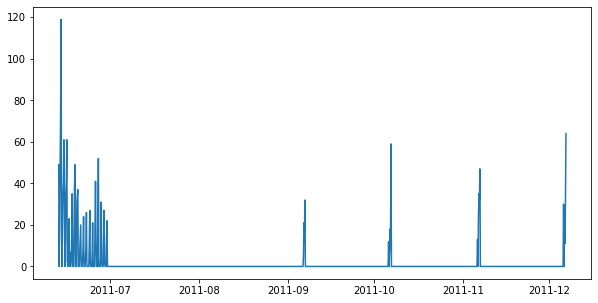

In [82]:
plt.plot(group_ts)

In [83]:
end_date = pd.Timestamp('2011-07-02')
idx = X[X['time'] == end_date].index.item()
X = X.iloc[:idx]
X['floor'] = 0

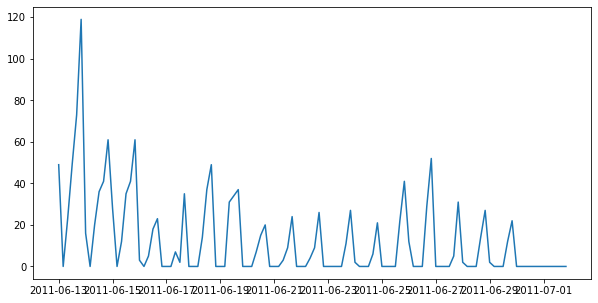

In [84]:
plt.plot(X['time'], X['sales'])

In [85]:
end_date = pd.Timestamp('2011-06-23')
idx = X[X['time'] == end_date].index.item()

train_X = X.iloc[:idx].reset_index(drop = True)
train_X.rename({'time': 'ds', 'sales': 'y'}, axis=1, inplace=True)

test_X =  X.iloc[idx:].reset_index(drop = True)
test_X.rename({'time': 'ds', 'sales': 'y'}, axis=1, inplace=True)

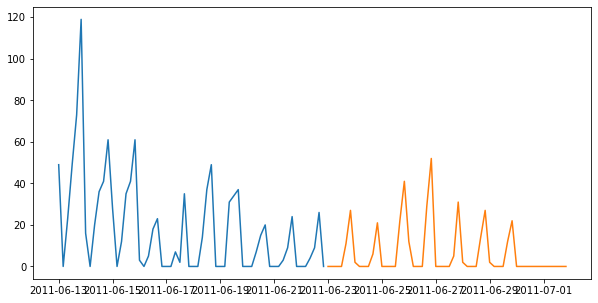

In [86]:
plt.plot(train_X['ds'], train_X['y'])
plt.plot(test_X['ds'], test_X['y'])

In [87]:
from prophet import Prophet

In [88]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(train_X)

16:39:23 - cmdstanpy - INFO - Chain [1] start processing
16:39:24 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
future = model.make_future_dataframe(periods=len(test_X), freq='4H')
forecast = model.predict(future)

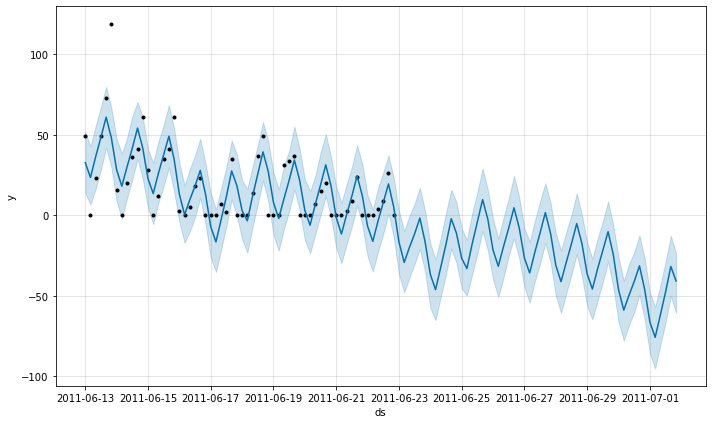

In [90]:
model.plot(forecast)
plt.show()

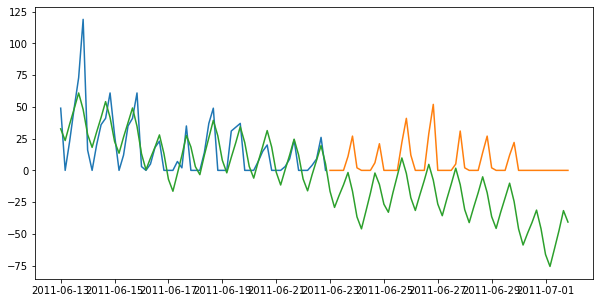

In [91]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(train_X['ds'] , train_X['y'] )
plt.plot(test_X['ds'] , test_X['y'] )
plt.plot(forecast['ds'], forecast['yhat'])

In [92]:
X

,time,sales,floor
0,2011-06-13 00:00:00,49,0
1,2011-06-13 04:00:00,0,0
2,2011-06-13 08:00:00,23,0
3,2011-06-13 12:00:00,49,0
4,2011-06-13 16:00:00,73,0
...,...,...,...
109,2011-07-01 04:00:00,0,0
110,2011-07-01 08:00:00,0,0
111,2011-07-01 12:00:00,0,0
112,2011-07-01 16:00:00,0,0
